In [24]:
### calculating the rightmost number of adding two bits


In [25]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

0+0 = 00
0+1 = 01
1+0 = 01
1+1 = 10

Right most bit's output works like XOR (CNOT)
Left most bit's output works like AND (Toffoli)

# Right most bit:
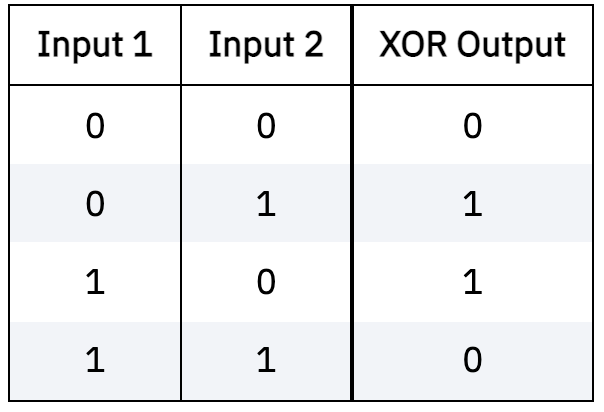

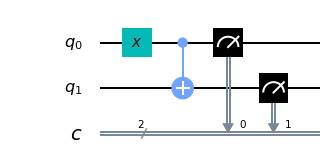

In [26]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.draw()
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

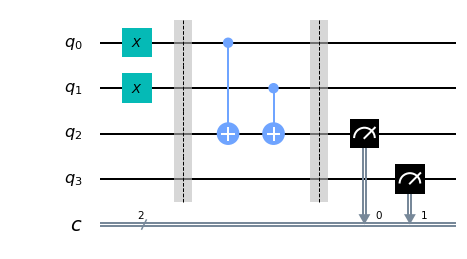

In [27]:
# algorithm working for right-most bit only

q = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
q.x(0)
q.x(1)
q.barrier()
# use cnots to write the XOR of the inputs on qubit 2
q.cx(0,2)
q.cx(1,2)
q.barrier()
# extract outputs
q.measure(2,0) # extract XOR value
q.measure(3,1)

q.draw()


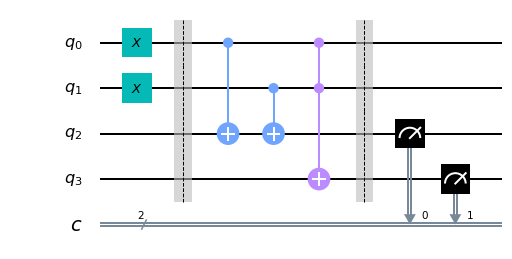

In [28]:
# FULL ALGO WORKING FOR BOTH BITS
qc_ha = QuantumCircuit(4,2)

qc_ha.x(0)
qc_ha.x(1)

qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
a = qc_ha.measure(2,0) # extract XOR value
b = qc_ha.measure(3,1) # extract AND value

qc_ha.draw()


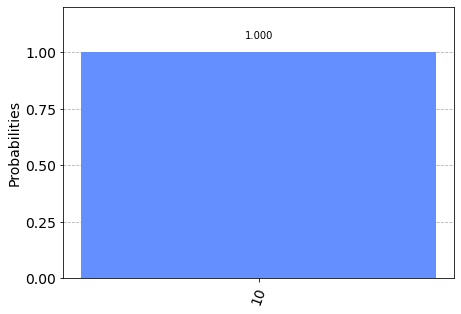

In [29]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc_ha, backend = backend, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

# CORRECT OUTCOMES:
# 0+0 = 00
# 0+1 = 01
# 1+0 = 01
# 1+1 = 10